In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 11

In [2]:
data = pd.read_csv('citrus.csv')
data_labels = data.iloc[:, 0].values
data_features = data.iloc[:, 1:].values

In [3]:
features = data_features
labels = data_labels
num_qubits = features.shape[1]
num_qubits

5

In [4]:
feature_map1  = ZZFeatureMap 

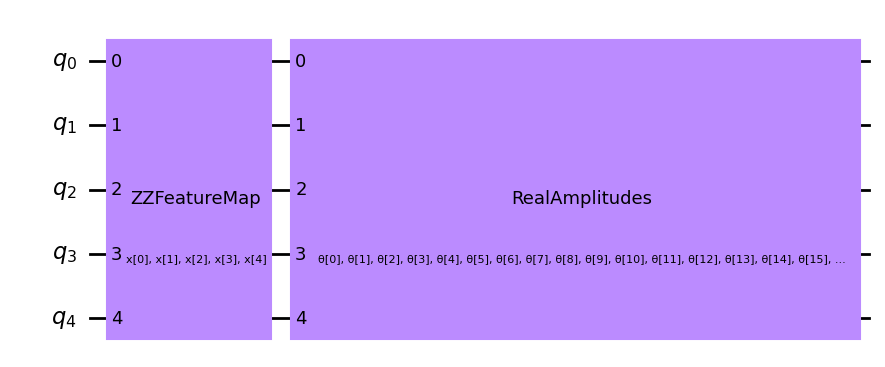

In [5]:
qc = QNNCircuit(num_qubits, feature_map=None, ansatz=None)
qc.draw("mpl", style="clifford")

In [8]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("X" * qc.num_qubits, 1)])
observable2 = SparsePauliOp.from_list([("Y" * qc.num_qubits, 1)])
observable3 = SparsePauliOp.from_list([("Z" * qc.num_qubits, 1)])


In [10]:
estimator_qnn = EstimatorQNN(
    circuit=qc, observables=observable1
)
estimator_qnn

In [12]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [13]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 5 
Input: [0.1285702  0.49927786 0.60149836 0.02868901 0.14792608]
Number of trainable weights for EstimatorQNN: 20 
Weights: [0.92821102 0.07042058 0.12977395 0.94832845 0.62188359 0.36899312
 0.51139002 0.66284295 0.27530882 0.13796807 0.78803959 0.67036058
 0.51238231 0.81673644 0.54907527 0.98091364 0.20450946 0.55373036
 0.4836247  0.35327486]


In [14]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[-0.04169767]]. 
Shape: (1, 1)


In [19]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [21]:
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=20), callback=callback_graph
)

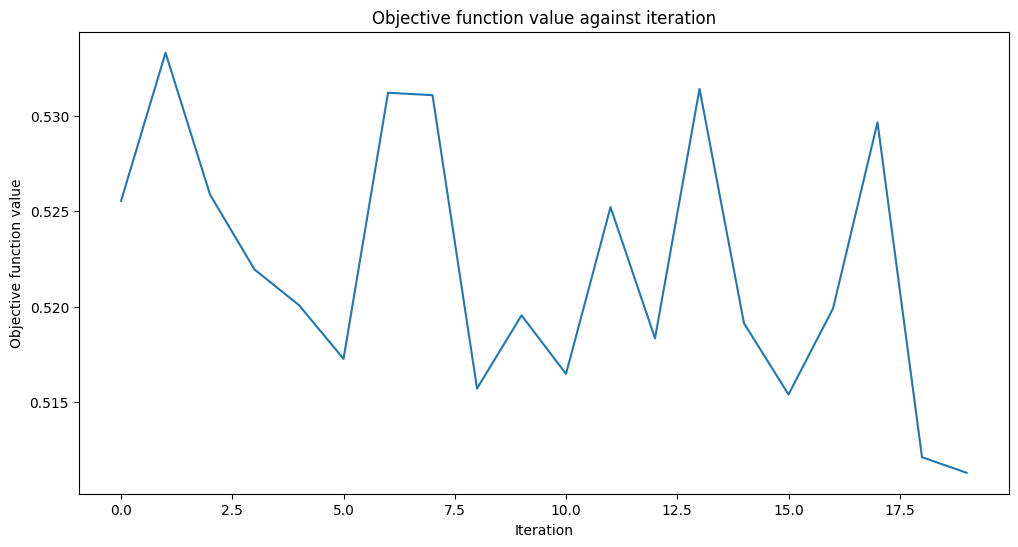

/Users/thiru/anaconda3/envs/qiskit/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [-1.]

In [22]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(features, labels)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(features, labels)